In [354]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')



In [355]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


EDA


In [356]:
df.columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [357]:
df.shape

(918, 12)

In [358]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [360]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

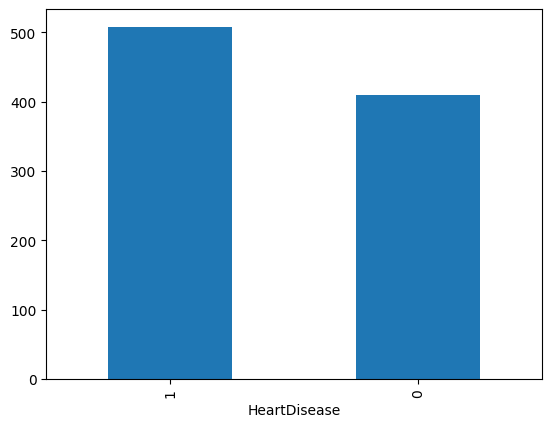

In [361]:
df['HeartDisease'].value_counts().plot(kind='bar')

In [362]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

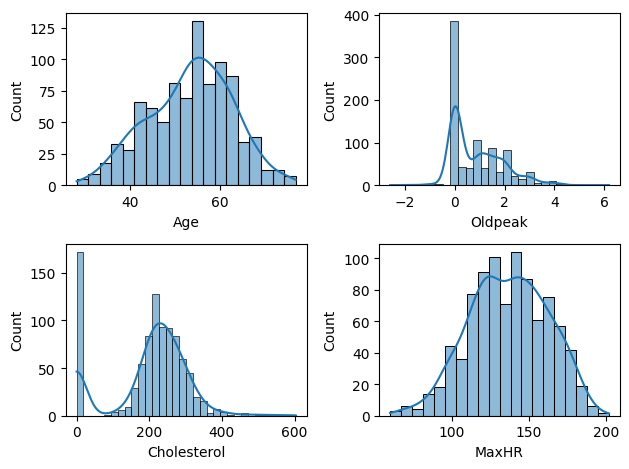

In [363]:
df = df.loc[:, ~df.columns.duplicated()]
df.columns
def plot(var, num):
    plt.subplot(2,2,num)
    sns.histplot(df[var], kde=True)
plot('Age' , 1)
plot('Oldpeak' , 2)
plot('Cholesterol' , 3)
plot('MaxHR' , 4)
plt.tight_layout()

df.columns


In [364]:
ch_mean = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean()
ch_mean

np.float64(244.6353887399464)

In [365]:
df['Cholesterol'] = df['Cholesterol'].replace(0, ch_mean)
df['Cholesterol'] = df['Cholesterol'].round(2)
# df['Cholesterol'].value_counts()
df['Cholesterol'].isnull().sum()

np.int64(0)

In [366]:
resting_bp = df.loc[df['RestingBP'] != 0 ,'RestingBP'].mean()
resting_bp
df['RestingBP'] = df['RestingBP'].replace(0, ch_mean)
df['RestingBPl'] = df['RestingBP'].round(2)
df['RestingBP'].value_counts()

RestingBP
120.0    132
130.0    118
140.0    107
110.0     58
150.0     55
        ... 
101.0      1
117.0      1
192.0      1
129.0      1
164.0      1
Name: count, Length: 67, dtype: int64

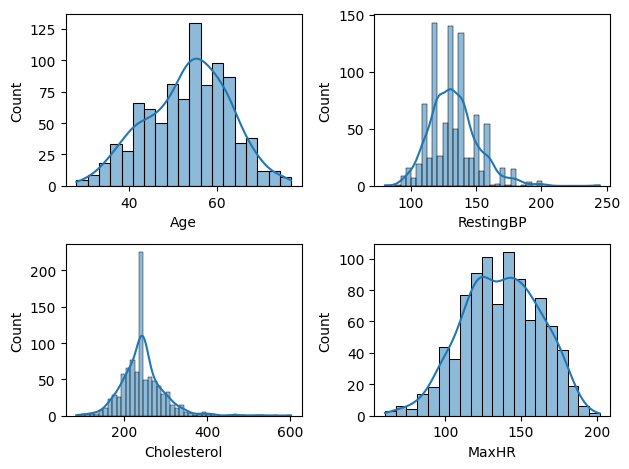

In [367]:
def plot(var, num):
    plt.subplot(2,2,num)
    sns.histplot(df[var], kde=True)
plot('Age' , 1)
plot('RestingBP' , 2)
plot('Cholesterol' , 3)
plot('MaxHR' , 4)
plt.tight_layout()

In [368]:
import sheryanalysis as sh 
sh.analyze(df)


🔍 Basic Analysis Report


------------------------------------------------------------
📏 Shape: (918, 13)
🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease', 'RestingBPl']

✅ No null values found

🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBPl']


{'shape': (918, 13),
 'columns': ['Age',
  'Sex',
  'ChestPainType',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'RestingECG',
  'MaxHR',
  'ExerciseAngina',
  'Oldpeak',
  'ST_Slope',
  'HeartDisease',
  'RestingBPl'],
 'dtypes': {'Age': dtype('int64'),
  'Sex': dtype('O'),
  'ChestPainType': dtype('O'),
  'RestingBP': dtype('float64'),
  'Cholesterol': dtype('float64'),
  'FastingBS': dtype('int64'),
  'RestingECG': dtype('O'),
  'MaxHR': dtype('int64'),
  'ExerciseAngina': dtype('O'),
  'Oldpeak': dtype('float64'),
  'ST_Slope': dtype('O'),
  'HeartDisease': dtype('int64'),
  'RestingBPl': dtype('float64')},
 'null_counts': {'Age': 0,
  'Sex': 0,
  'ChestPainType': 0,
  'RestingBP': 0,
  'Cholesterol': 0,
  'FastingBS': 0,
  'RestingECG': 0,
  'MaxHR': 0,
  'ExerciseAngina': 0,
  'Oldpeak': 0,
  'ST_Slope': 0,
  'HeartDisease': 0,
  'RestingBPl': 0},
 'total_rows': 918,
 'column_types': {'categorical': ['Sex',
   'ChestPainType',
   'FastingBS',
   'RestingECG',
   'ExerciseAng

<Axes: xlabel='Sex', ylabel='count'>

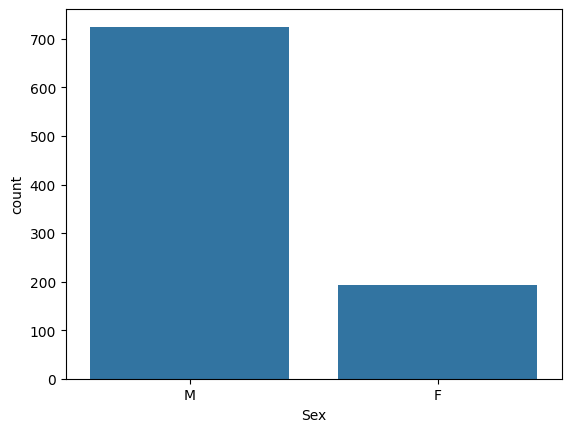

In [369]:
sns.countplot(x =df['Sex'])

<Axes: xlabel='ChestPainType', ylabel='count'>

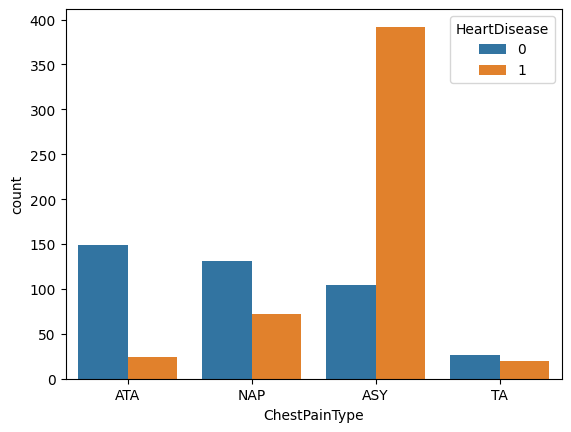

In [370]:
sns.countplot(x=df['ChestPainType'], hue=df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

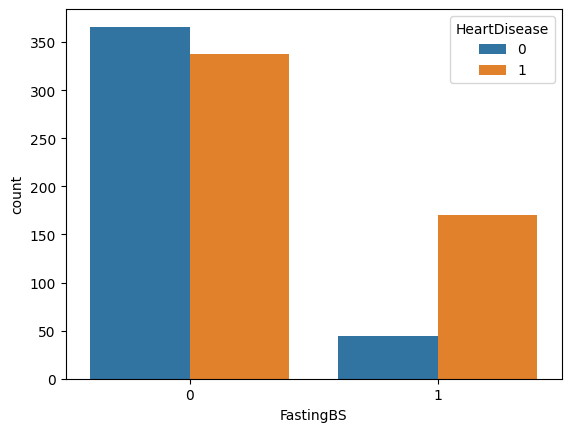

In [371]:
sns.countplot(x=df['FastingBS'],hue=df['HeartDisease'])

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'RestingBPl'],
      dtype='object')

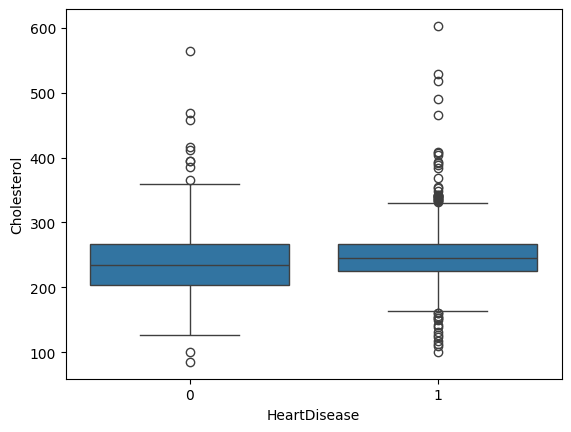

In [372]:
sns.boxplot(x=df['HeartDisease'],y=df['Cholesterol'])
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'RestingBPl'],
      dtype='object')

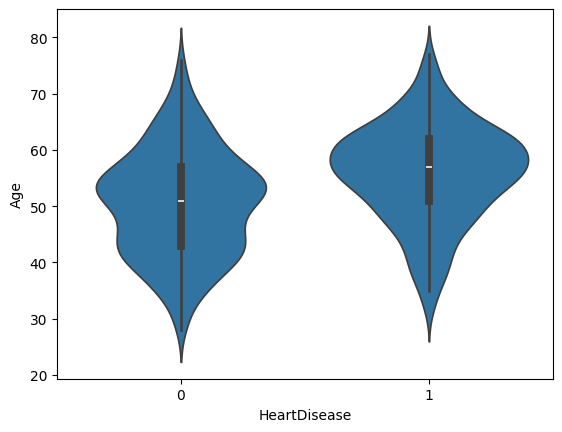

In [373]:
sns.violinplot(x=df['HeartDisease'], y=df['Age'])
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'RestingBPl'],
      dtype='object')

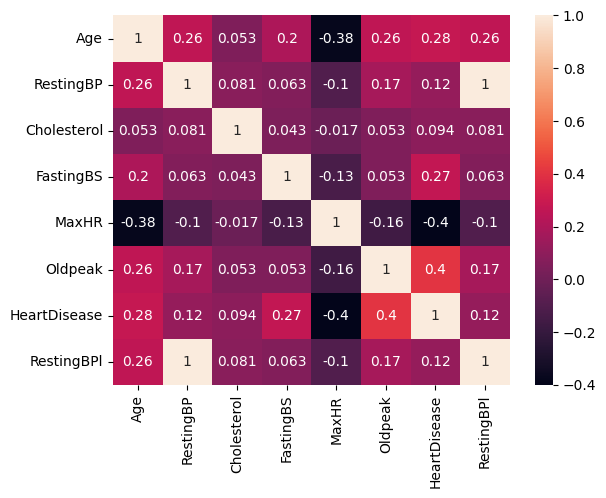

In [374]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
df.columns

data preprocessing and cleaning


In [375]:
df_encode = pd.get_dummies(df, drop_first=True)
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,RestingBPl,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,140.0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,160.0,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,130.0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,138.0,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,150.0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,110.0,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,144.0,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,130.0,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,130.0,False,True,False,False,False,False,False,True,False


In [376]:
df_encode = df_encode.astype(int)

In [377]:
# from sklearn.preprocessing import StandardScaler

# numerical_col = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', "Oldpeak", "RestingBPl"]

# scaler = StandardScaler()
# df_encode[numerical_col] = scaler.fit_transform(df_encode[numerical_col])

# df_encode.head()



In [378]:
from scipy.stats import pearsonr

selected_feat = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR','Oldpeak', 'Sex_M', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']
corelation = {
    feature : pearsonr(df_encode[feature], df_encode['HeartDisease'])[0]
    for feature in selected_feat

}
corelation

{'Age': np.float64(0.28203850581899725),
 'RestingBP': np.float64(0.1214905607267944),
 'Cholesterol': np.float64(0.09258582507897907),
 'FastingBS': np.float64(0.26729118611029795),
 'MaxHR': np.float64(-0.4004207694631902),
 'Oldpeak': np.float64(0.3923854039198435),
 'Sex_M': np.float64(0.30544491596314066),
 'ChestPainType_NAP': np.float64(-0.21296362503940602),
 'ChestPainType_TA': np.float64(-0.05479026202691396),
 'RestingECG_Normal': np.float64(-0.09157996051345989),
 'RestingECG_ST': np.float64(0.1025272221898666),
 'ExerciseAngina_Y': np.float64(0.4942819918242685),
 'ST_Slope_Flat': np.float64(0.5541335908840069),
 'ST_Slope_Up': np.float64(-0.622164208395995)}

In [379]:
correlations_df =pd.DataFrame(list(corelation.items()), columns=['Feature', 'Pearson Correlation'])
sorted_data = correlations_df.sort_values(by='Pearson Correlation' , ascending=False)
sorted_data

,Feature,Pearson Correlation
12,ST_Slope_Flat,0.554134
11,ExerciseAngina_Y,0.494282
5,Oldpeak,0.392385
6,Sex_M,0.305445
0,Age,0.282039
3,FastingBS,0.267291
1,RestingBP,0.121491
10,RestingECG_ST,0.102527
2,Cholesterol,0.092586
8,ChestPainType_TA,-0.054790


In [380]:
 cat_feature =['Age',  'FastingBS', 'MaxHR','Oldpeak', 'Sex_M', 'ChestPainType_NAP', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']

In [381]:

# Importing 5 popular classification models from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [382]:
df_encode.columns
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,RestingBPl,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,140,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,160,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,130,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,138,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,150,1,0,1,0,1,0,0,0,1


In [383]:
X = df_encode.drop(['HeartDisease' , 'RestingBPl'] , axis=1)
Y = df_encode['HeartDisease']

In [384]:
X_train, X_test, y_train, y_test = train_test_split(
   X, Y, test_size=0.20, random_state=42)


In [385]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)


In [386]:
models = {
    "LogisticRegression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Niave Bayes": GaussianNB(),
    "Decision tree": DecisionTreeClassifier(),
    "SVM": SVC(kernel='rbf')
}

In [387]:
result = []

In [388]:
for name , model in models.items():
    model.fit(X_train_scale, y_train)
    y_pred = model.predict(X_test_scale)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    result.append({
        'model': name,
        'Accuracy': round (acc, 3),
        'f1 score': round( f1, 3)
    })

In [389]:
result

[{'model': 'LogisticRegression', 'Accuracy': 0.87, 'f1 score': 0.886},
 {'model': 'KNN', 'Accuracy': 0.87, 'f1 score': 0.886},
 {'model': 'Niave Bayes', 'Accuracy': 0.853, 'f1 score': 0.868},
 {'model': 'Decision tree', 'Accuracy': 0.777, 'f1 score': 0.8},
 {'model': 'SVM', 'Accuracy': 0.848, 'f1 score': 0.868}]

In [391]:
import joblib
joblib.dump(models['KNN'], 'KNN_heart.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'columns.pkl')

['columns.pkl']